In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
df_base = pd.read_csv('../data/processed/data_processed_1990_2023.csv', index_col='fecha')
df_base.drop('target', axis=1, inplace=True)
df_base.index = pd.to_datetime(df_base.index)
df_base.tail(7)

,tmin,tmax,tmed,presMin,presMax,dir,velmedia,racha,sol,prec
fecha,,,,,,,,,,
2023-03-06,10.3,15.9,13.1,1008.7,1013.4,21.0,1.9,8.3,0.0,3.3
2023-03-07,12.9,19.7,16.3,1009.8,1013.4,22.0,3.9,10.3,3.2,0.6
2023-03-08,14.4,20.5,17.4,1011.6,1015.1,22.0,6.1,10.3,3.2,2.5
2023-03-09,13.6,20.5,17.0,1013.7,1019.5,21.0,5.3,12.5,3.0,0.9
2023-03-10,8.9,21.8,15.4,1019.2,1022.5,99.0,1.7,6.7,10.5,0.1
2023-03-11,8.9,24.0,16.4,1018.7,1022.2,99.0,2.8,7.8,9.9,0.0
2023-03-12,9.5,26.5,18.0,1014.1,1020.3,8.0,2.2,8.3,10.6,0.0


In [83]:
df_last_500 = df_base.iloc[-500:]
df_last_500.head()

,tmin,tmax,tmed,presMin,presMax,dir,velmedia,racha,sol,prec
fecha,,,,,,,,,,
2021-10-29,16.40,23.60,20.00,1009.2,1013.1,22.0,7.2,15.3,1.1,1.5
2021-10-30,13.76,24.12,18.91,1007.6,1013.4,22.0,10.0,17.5,0.0,1.5
2021-10-31,13.24,24.40,18.15,1012.7,1015.5,99.0,6.1,12.8,1.5,1.2
2021-11-01,19.50,24.60,22.00,1011.5,1014.3,99.0,5.0,11.7,2.6,6.3
2021-11-02,15.20,20.40,17.80,1008.9,1014.6,25.0,2.8,8.9,3.7,0.0


Voy a ir haciendo las pruebas con el last 500 para que no pese mucho

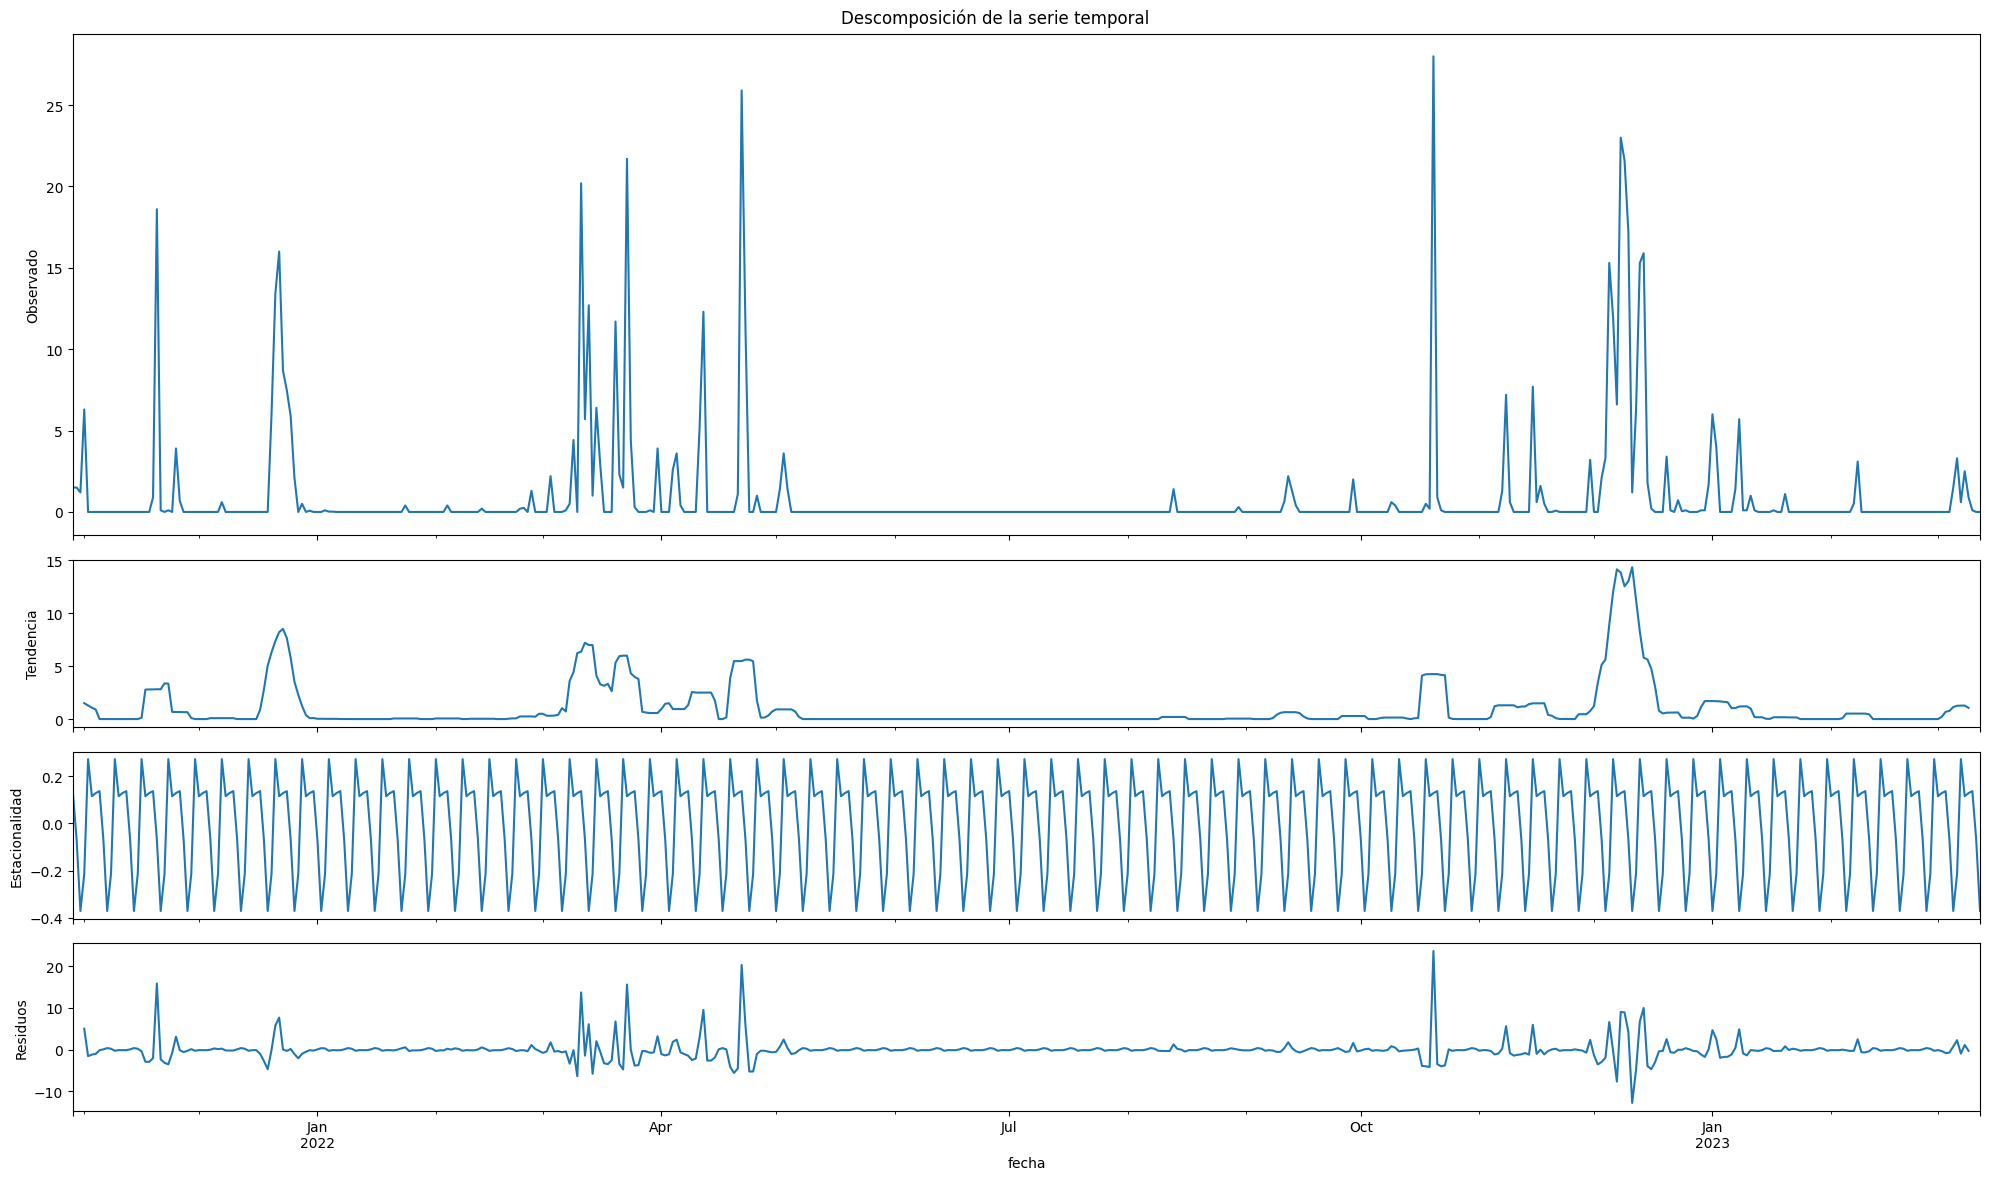

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_last_500['prec'], model="additive")

# Reescalar el plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1]})

# Graficar cada una de las subplots
decompose_data.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observado')

decompose_data.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Tendencia')

decompose_data.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Estacionalidad')

decompose_data.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residuos')

# Agregar título a la figura
fig.suptitle('Descomposición de la serie temporal')

# Ajustar el espaciado entre las subplots
fig.tight_layout()

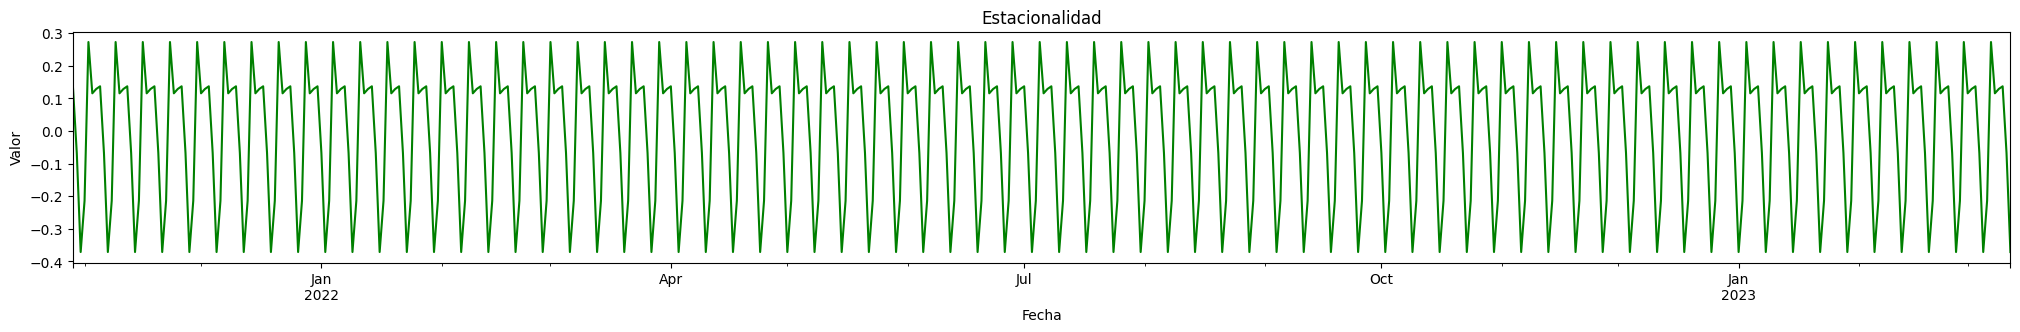

In [85]:
seasonality=decompose_data.seasonal
# Reescalar el plot
fig, ax = plt.subplots(figsize=(25, 3))

# Graficar la serie temporal
seasonality.plot(ax=ax, color='green')

# Agregar título y etiquetas a los ejes
ax.set_title('Estacionalidad')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

# Mostrar el plot
plt.show()

ADFULLER

In [86]:
from statsmodels.tsa.stattools import adfuller
df_adf = adfuller(df_base['prec'], autolag = 'AIC')
print("1. ADF : ",df_adf[0])
print("2. P-Value : ", df_adf[1])
print("3. Num Of Lags : ", df_adf[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", df_adf[3])
print("5. Critical Values :")
for key, val in df_adf[4].items():
    print("\t",key, ": ", val)
print(f"Resultado: La serie es {'no' if df_adf[1] > 0.05 else ''}estacionaria")

1. ADF :  -13.777100805911534
2. P-Value :  9.445527625297594e-26
3. Num Of Lags :  35
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 12088
5. Critical Values :
	 1% :  -3.43089108944354
	 5% :  -2.8617791338963228
	 10% :  -2.566897285934747
Resultado: La serie es estacionaria


KPSS

In [87]:
from statsmodels.tsa.stattools import kpss

df_kpss = kpss(df_base['prec'])
print("1. KPSS : ",df_kpss[0])
print("2. P-Value : ", df_kpss[1])
print("3. Num Of Lags : ", df_kpss[2])
print("4. Critical Values :")
for key, val in df_kpss[3].items():
    print("\t",key, ": ", val)
print(f"Resultado: La serie es {'no' if df_kpss[1] < 0.05 else ''}estacionaria")

1. KPSS :  0.13135829125926282
2. P-Value :  0.1
3. Num Of Lags :  45
4. Critical Values :
	 10% :  0.347
	 5% :  0.463
	 2.5% :  0.574
	 1% :  0.739
Resultado: La serie es estacionaria


In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

AUTOCORRELATION PLOT

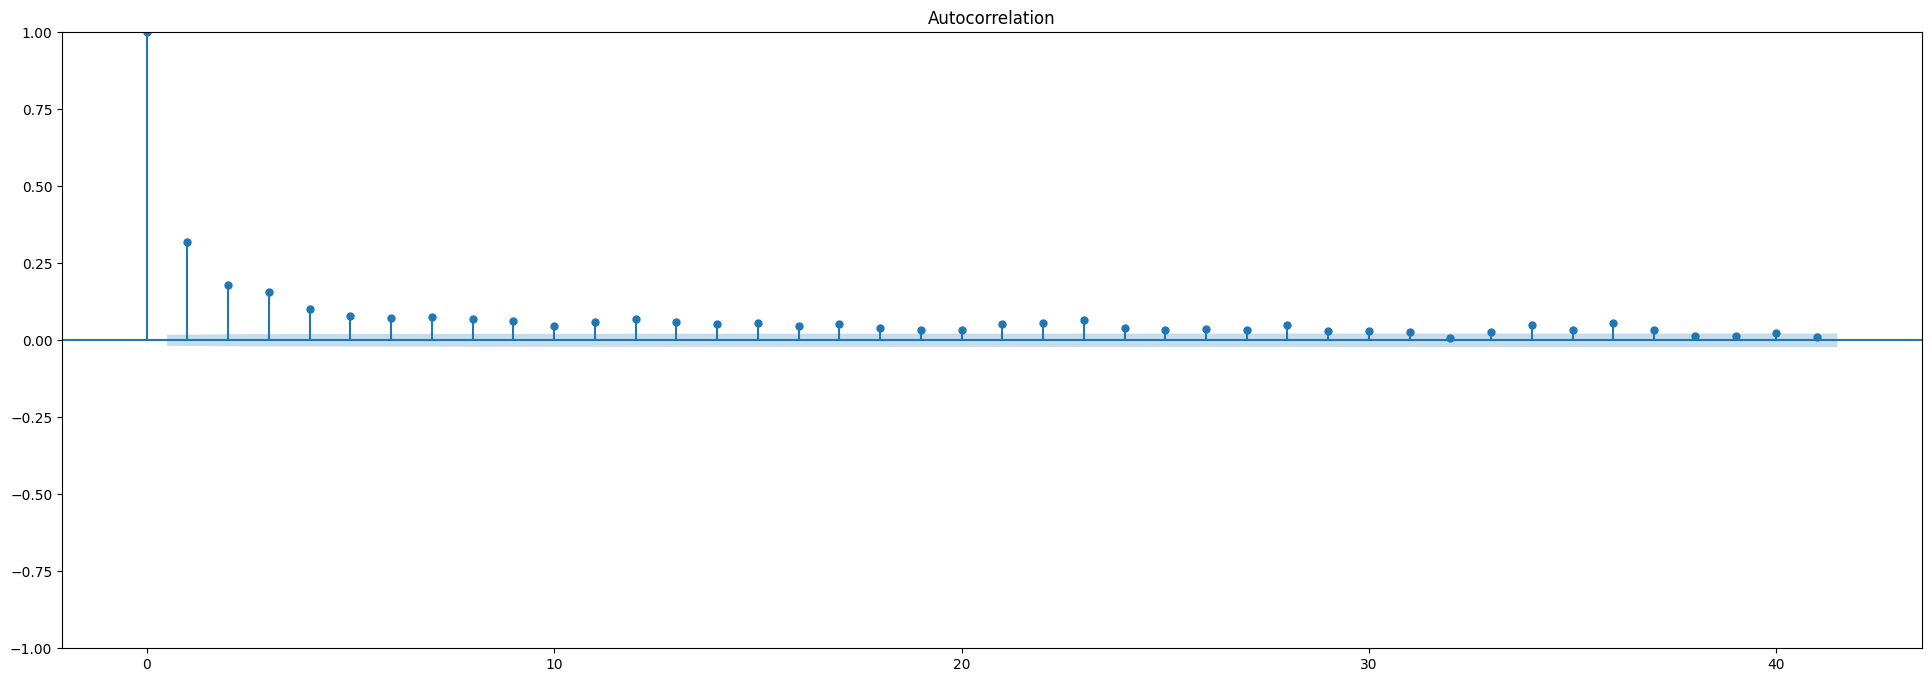

In [103]:
fig, ax = plt.subplots(figsize=(24, 8))
plot_acf(df_base['prec'], ax=ax)
plt.show()

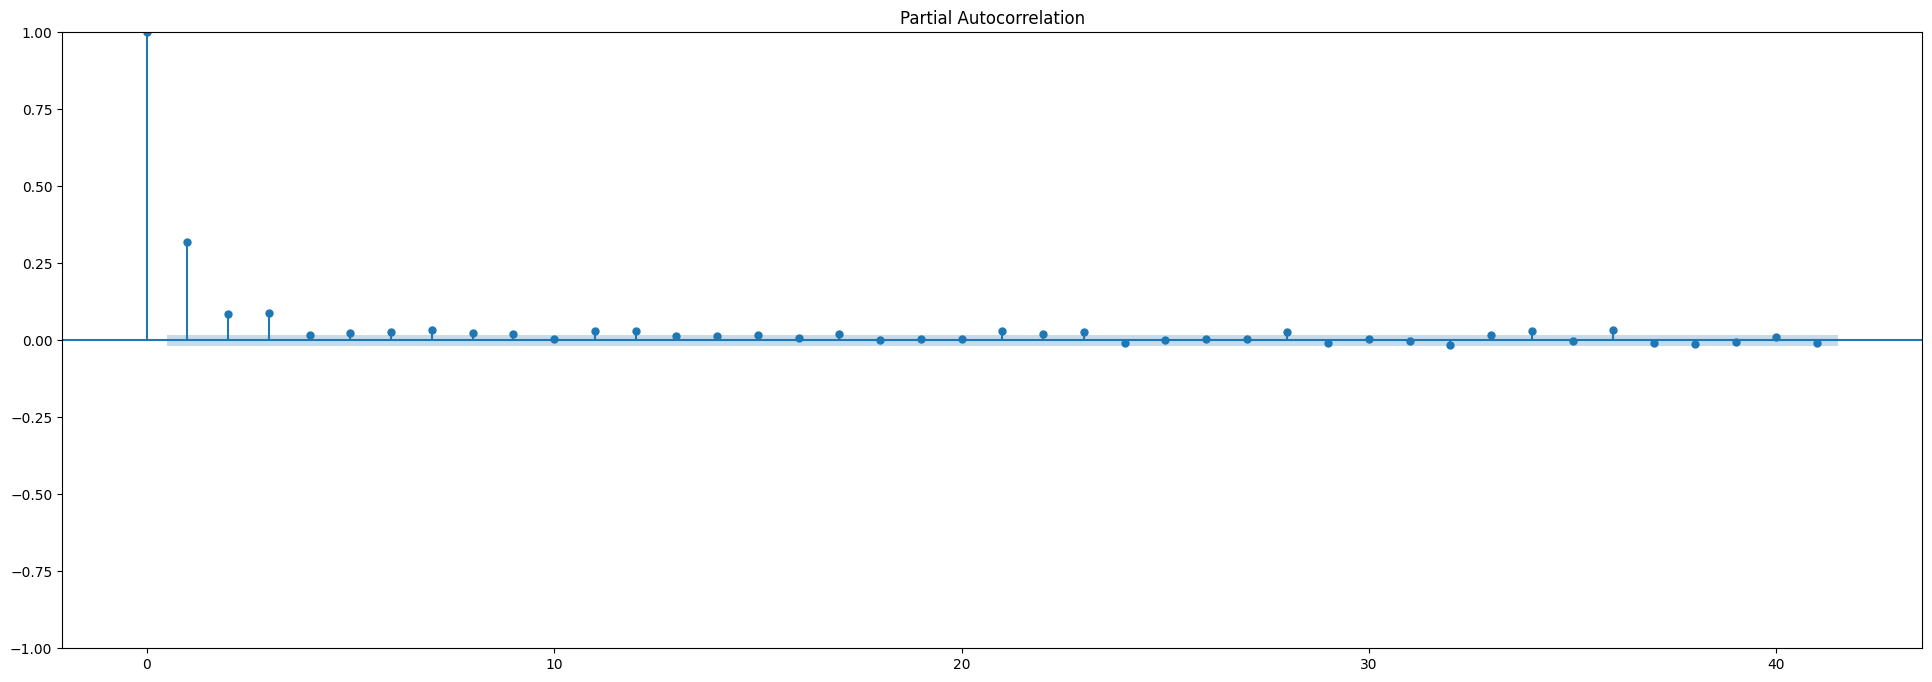

In [108]:
fig, ax = plt.subplots(figsize=(24, 8))
plot_pacf(df_base['prec'], ax=ax)
plt.show()

Como en en el ACF vemos el corte en el retraso 32, su valor de `q` será = 31, mientras que en el PACF vemos que el corte está en el retraso 11, con lo que su valor de `p` será = 10.

SEASONAL (ACF)

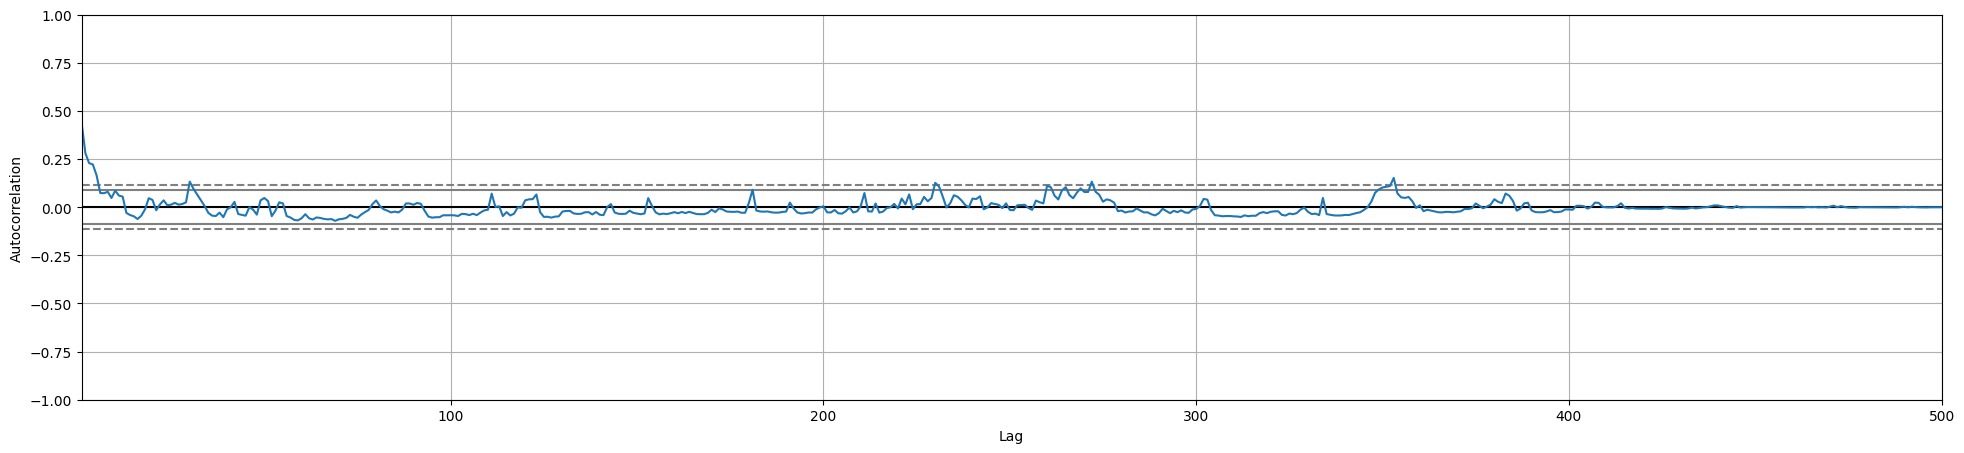

In [111]:
fig, ax = plt.subplots(figsize=(24, 5))

x = pd.plotting.autocorrelation_plot(df_last_500['prec'])
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

AR

In [112]:
from statsmodels.tsa.ar_model import AutoReg

model_ar = AutoReg(df_base['prec'], lags=31)
resultados_ar = model_ar.fit()
resultados_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   prec   No. Observations:                12124
Model:                    AutoReg(31)   Log Likelihood              -36282.087
Method:               Conditional MLE   S.D. of innovations              4.861
Date:                Thu, 16 Mar 2023   AIC                          72630.173
Time:                        15:10:10   BIC                          72874.386
Sample:                    02-01-1990   HQIC                         72712.063
                         - 03-12-2023                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5356      0.056      9.516      0.000       0.425       0.646
prec.L1        0.2766      0.009     30.414      0.000       0.259       0.294
prec.L2        0.0522      0.009      5.528      0.000       0.034       0.071
prec.L3        0.0770      0.009      8.146      0.000       0.058       0.095
prec.L4        0.0047      0.009      0.494      0.621      -0.014       0.023
prec.L5        0.0085      0.009      0.900      0.368      -0.010       0.027
prec.L6        0.0102      0.009      1.078      0.281      -0.008       0.029
prec.L7        0.0242      0.009      2.561      0.010       0.006       0.043
prec.L8        0.0141      0.009      1.486      0.137      -0.004       0.033
prec.L9        0.0121      0.009      1.275      0.202      -0.006       0.031
prec.L10      -0.0092      0.009     -0.971      0.332      -0.028       0.009
prec.L11       0.0172      0.009      1.818      0.069      -0.001       0.036
prec.L12       0.0235      0.009      2.485      0.013       0.005       0.042
prec.L13       0.0088      0.009      0.934      0.351      -0.010       0.027
prec.L14       0.0043      0.009      0.457      0.648      -0.014       0.023
prec.L15       0.0125      0.009      1.318      0.188      -0.006       0.031
prec.L16       0.0012      0.009      0.123      0.902      -0.017       0.020
prec.L17       0.0175      0.009      1.845      0.065      -0.001       0.036
prec.L18      -0.0038      0.009     -0.402      0.688      -0.022       0.015
prec.L19      -0.0009      0.009     -0.094      0.925      -0.019       0.018
prec.L20      -0.0074      0.009     -0.785      0.432      -0.026       0.011
prec.L21       0.0243      0.009      2.573      0.010       0.006       0.043
prec.L22       0.0131      0.009      1.379      0.168      -0.005       0.032
prec.L23       0.0299      0.009      3.155      0.002       0.011       0.048
prec.L24      -0.0099      0.009     -1.043      0.297      -0.028       0.009
prec.L25      -0.0037      0.009     -0.393      0.694      -0.022       0.015
prec.L26       0.0035      0.009      0.365      0.715      -0.015       0.022
prec.L27      -0.0016      0.009     -0.172      0.863      -0.020       0.017
prec.L28       0.0294      0.009      3.109      0.002       0.011       0.048
prec.L29      -0.0098      0.009     -1.039      0.299      -0.028       0.009
prec.L30       0.0041      0.009      0.440      0.660      -0.014       0.023
prec.L31      -0.0014      0.009     -0.157      0.875      -0.019       0.016
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1579           -0.0000j            1.1579           -0.5000
AR.2            -1.0949           -0.2283j            1.1184           -0.4673
AR

In [114]:
predicciones_ar = resultados_ar.predict(start=len(df_base['prec']), end=len(df_base['prec'])+7)

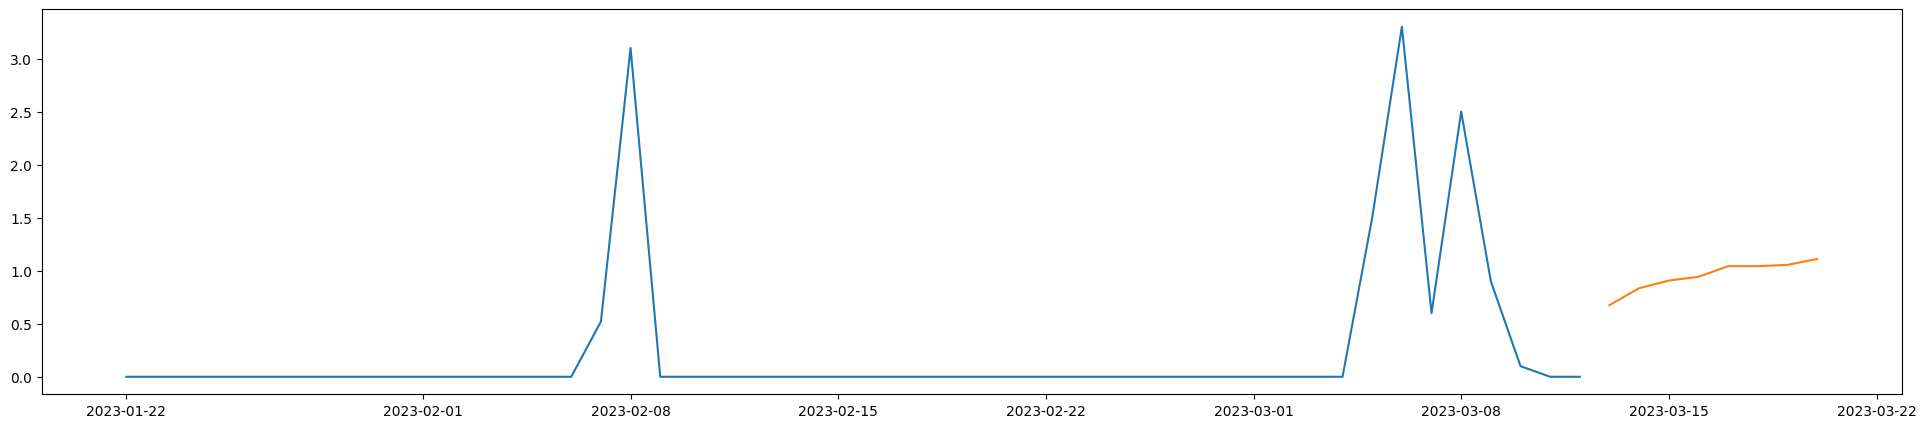

In [116]:
plt.subplots(figsize=(24, 5))
plt.plot(df_base['prec'][-50:])
plt.plot(predicciones_ar)
plt.show()

ARIMA

In [117]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(df_base['prec'], order=(31,0,10))
resultados_arima = model_arima.fit()
resultados_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   prec   No. Observations:                12124
Model:               ARIMA(31, 0, 10)   Log Likelihood              -36370.163
Date:                Thu, 16 Mar 2023   AIC                          72826.326
Time:                        15:18:19   BIC                          73144.652
Sample:                    01-01-1990   HQIC                         72933.054
                         - 03-12-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4208      0.232      6.118      0.000       0.966       1.876
ar.L1          0.1354      2.025      0.067      0.947      -3.833       4.104
ar.L2          0.0561      1.962      0.029      0.977      -3.789       3.901
ar.L3          0.0976      0.962      0.101      0.919      -1.788       1.983
ar.L4         -0.0902      0.707     -0.128      0.898      -1.475       1.295
ar.L5          0.0483      0.858      0.056      0.955      -1.634       1.731
ar.L6          0.2755      0.755      0.365      0.715      -1.204       1.756
ar.L7          0.0387      1.141      0.034      0.973      -2.197       2.274
ar.L8          0.4946      0.970      0.510      0.610      -1.407       2.396
ar.L9         -0.2355      0.820     -0.287      0.774      -1.842       1.371
ar.L10        -0.1036      0.699     -0.148      0.882      -1.475       1.267
ar.L11         0.0054      0.236      0.023      0.982      -0.456       0.467
ar.L12         0.0319      0.058      0.549      0.583      -0.082       0.146
ar.L13         0.0085      0.061      0.141      0.888      -0.110       0.127
ar.L14        -0.0050      0.057     -0.087      0.931      -0.117       0.107
ar.L15        -0.0001      0.038     -0.004      0.997      -0.074       0.074
ar.L16         0.0027      0.032      0.085      0.932      -0.060       0.065
ar.L17         0.0116      0.036      0.319      0.750      -0.060       0.083
ar.L18        -0.0017      0.033     -0.052      0.958      -0.066       0.063
ar.L19        -0.0129      0.029     -0.446      0.655      -0.069       0.044
ar.L20        -0.0213      0.030     -0.720      0.472      -0.079       0.037
ar.L21         0.0202      0.040      0.510      0.610      -0.058       0.098
ar.L22         0.0145      0.047      0.308      0.758      -0.078       0.107
ar.L23         0.0225      0.056      0.404      0.686      -0.087       0.132
ar.L24        -0.0099      0.049     -0.200      0.841      -0.106       0.087
ar.L25        -0.0072      0.038     -0.190      0.849      -0.081       0.067
ar.L26         0.0124      0.027      0.461      0.645      -0.040       0.065
ar.L27        -0.0055      0.042     -0.132      0.895      -0.087       0.076
ar.L28         0.0315      0.042      0.745      0.456      -0.051       0.114
ar.L29        -0.0197      0.053     -0.376      0.707      -0.123       0.083
ar.L30      8.346e-05      0.054      0.002      0.999      -0.105       0.105
ar.L31        -0.0087      0.036     -0.243      0.808      -0.079       0.062
ma.L1          0.1418      2.025      0.070      0.944      -3.827       4.110
ma.L2          0.0349      2.095      0.017      0.987      -4.070       4.140
ma.L3         -0.0043      0.847     -0.005      0.996      -1.664       1.655
ma.L4          0.1072      0.743      0.144      0.885      -1.349       1.564
ma.L5         -0.0086      0.927     -0.009      0.993      -1.826       1.808
ma.L6         -0.2624      0.789     -0.333      0.739      -1.809       1.284
ma

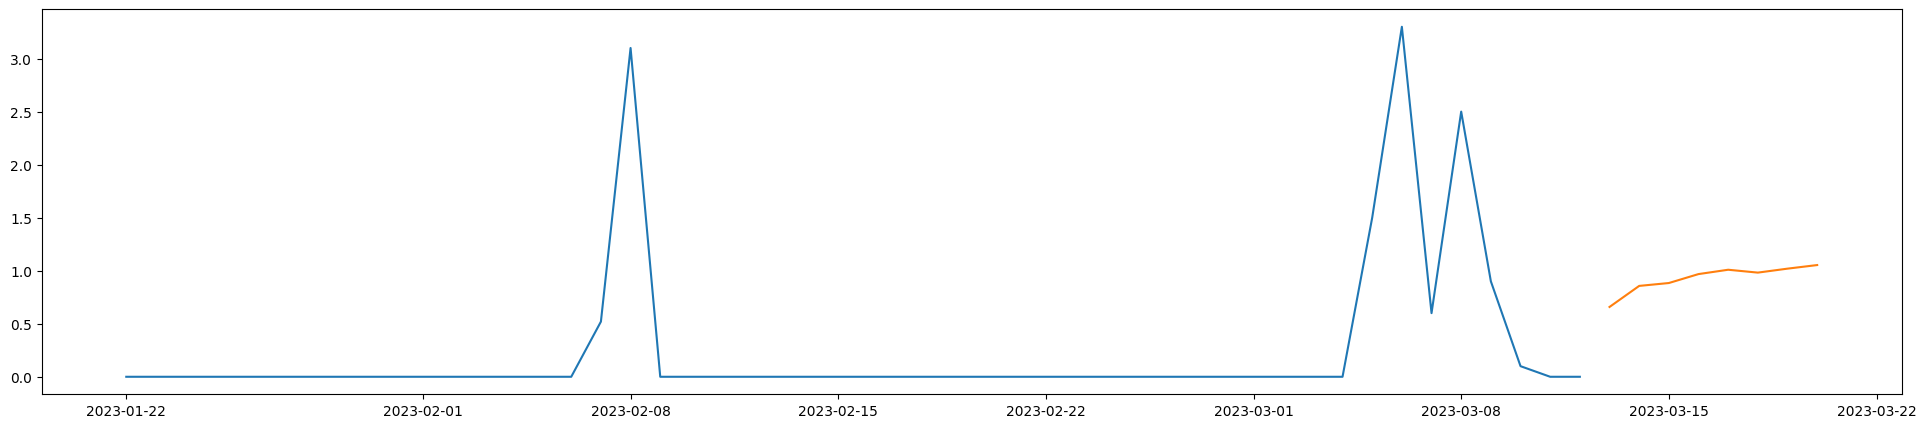

In [119]:
predicciones_arima = resultados_arima.predict(start=len(df_base['prec']), end=len(df_base['prec'])+7)
plt.subplots(figsize=(24, 5))
plt.plot(df_base['prec'][-50:])
plt.plot(predicciones_arima)
plt.show()

------

AUTO ARIMA 

https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

ES ESTACIONARIO, NO HAY QUE DIFERENCIAR

In [120]:
df_base = pd.read_csv('../data/processed/data_processed_1990_2023.csv', index_col='fecha')
df_base.drop('target', axis=1, inplace=True)
df_base.index = pd.to_datetime(df_base.index)
df_last_500 = df_base.iloc[-500:]

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=72917.595, Time=3.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=74383.751, Time=0.72 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=73073.160, Time=1.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=73300.948, Time=1.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75251.046, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=72848.366, Time=4.67 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=72986.729, Time=2.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=72842.117, Time=9.94 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=72893.687, Time=3.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=72813.679, Time=16.85 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=72891.442, Time=3.81 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=72814.036, Time=17.27 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=72814.390, Time=18.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=72847.965, Time=13.22 sec
 ARIMA(5,0,0)(0

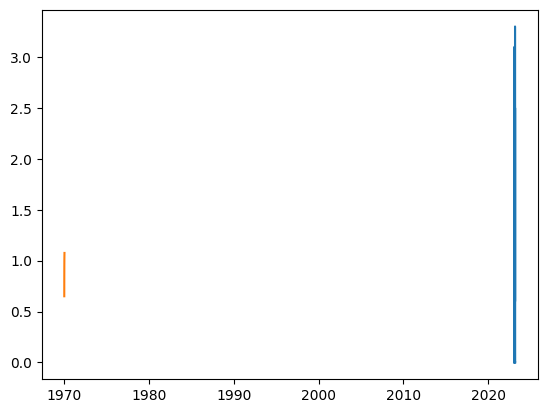

In [123]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# AUTO ARIMA CON PARÁMETROS
model_auto_arima = auto_arima(df_base['prec'],
                              d=0,
                              start_p=1, start_q=1,
                              max_p=15, max_q=35,
                              seasonal=True, trace=True,
                              error_action='ignore', suppress_warnings=True,
                              stepwise=True, stationary=True, method='lbfgs',
                              maxiter=100, n_jobs=-1,
                              out_of_sample_size=int(len(df_base['prec'])*0.1), 
                              freq='D')

# ENTRENO EL MODELO
resultados_auto_arima = model_auto_arima.fit(df_base['prec'])

# RESULTADOS
print(resultados_auto_arima.summary())

# PREDICCIONES
predicciones_auto_arima = resultados_auto_arima.predict(start=len(df_base['prec']), end=len(df_base['prec'])+7)
plt.plot(df_base['prec'][-50:])
plt.plot(predicciones_auto_arima)
plt.show()


---
SARIMAX

Estacionario: d + D = 0

In [128]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

import warnings
warnings.filterwarnings('ignore')

def sarimax(ts,exo,all_param):
    results = []
    for param in all_param:
        try:
            mod = SARIMAX(ts,
                          exog = exo,
                          order=param[0],
                          seasonal_order=param[1])
            res = mod.fit()
            results.append((res,res.aic,param))
            print('Tried out SARIMAX{}x{} - AIC:{}'.format(param[0], param[1], round(res.aic,2)))
        except Exception as e:
            print(e)
            continue
            
    return results

In [132]:
train = df_base.iloc[:-500]['prec']
test = df_base.iloc[-500:]['prec']

exo = df_base.iloc[:-500].drop('prec', axis=1)

In [127]:
p, d, q = range(0, 5), [0], range(0, 5)
P, D, Q, s = range(0, 5), [0], range(0, 5), [7]

pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))
all_param = list(itertools.product(pdq, seasonal_pdq))

all_res = sarimax(train, exo, all_param)

NameError: name 'exo' is not defined

In [ ]:
all_res.sort(key=lambda x: x[1])
all_res[:5]

In [ ]:
res = all_res[0][0]
res.plot_diagnostics(figsize=(15, 12))

plt.show()
print("Ljung-box p-values:\n" + str(res.test_serial_correlation(method='ljungbox')[0][1]))
res.summary()